In [77]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [78]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS =3
EPOCHS=30

In [79]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage" ,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [80]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

(32, 256, 256, 3)
[0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 2 1 1 2 1 1 1 0 1 1]


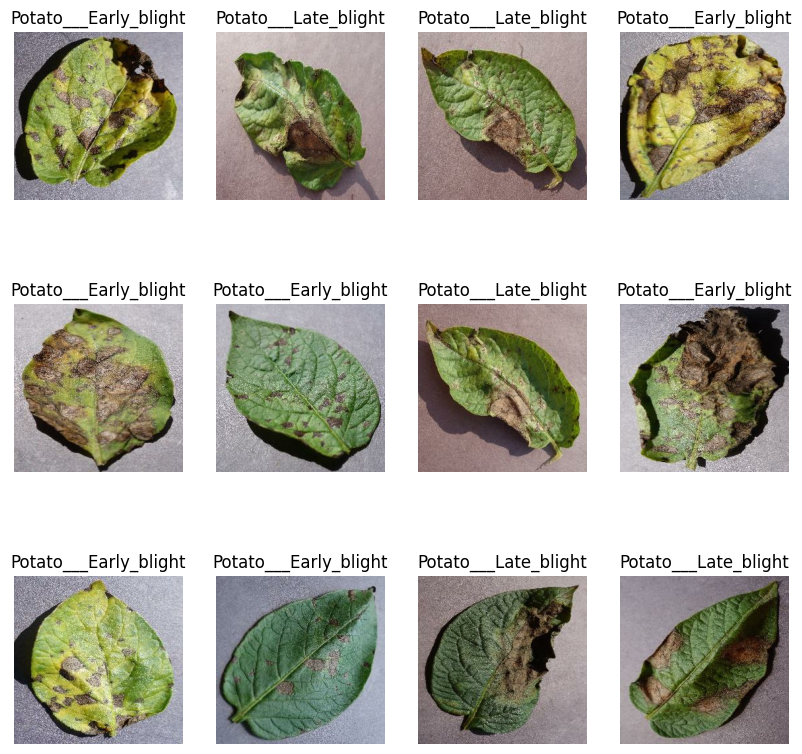

In [81]:
plt.figure(figsize=(10,10))
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [82]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [83]:
train_ds=dataset.take(54)
len(train_ds)

54

In [84]:
test_ds=dataset.skip(54)
len(test_ds)

14

In [85]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [86]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [87]:
test_ds=test_ds.skip(6)
len(test_ds)

8

In [88]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000 ):
    assert (train_split+test_split+val_split) == 1
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
        
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds,val_ds,test_ds

In [89]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [90]:
len(train_ds)

54

In [91]:
train_ds = train_ds.cache().shuffle(10000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(10000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(10000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [92]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].numpy()/255)

[[[0.68235296 0.6745098  0.7254902 ]
  [0.6117647  0.6039216  0.654902  ]
  [0.6156863  0.60784316 0.65882355]
  ...
  [0.3764706  0.38039216 0.4509804 ]
  [0.4392157  0.44313726 0.5137255 ]
  [0.48235294 0.4862745  0.5568628 ]]

 [[0.61960787 0.6117647  0.6627451 ]
  [0.6627451  0.654902   0.7058824 ]
  [0.6745098  0.6666667  0.7176471 ]
  ...
  [0.43137255 0.43529412 0.5058824 ]
  [0.4392157  0.44313726 0.5137255 ]
  [0.43137255 0.43529412 0.5058824 ]]

 [[0.5137255  0.5058824  0.5568628 ]
  [0.61960787 0.6117647  0.6627451 ]
  [0.67058825 0.6627451  0.7137255 ]
  ...
  [0.45882353 0.4627451  0.53333336]
  [0.42745098 0.43137255 0.5019608 ]
  [0.38431373 0.3882353  0.45882353]]

 ...

 [[0.7058824  0.69803923 0.7529412 ]
  [0.69803923 0.6901961  0.74509805]
  [0.69411767 0.6862745  0.7411765 ]
  ...
  [0.5019608  0.49411765 0.5372549 ]
  [0.5019608  0.49411765 0.5372549 ]
  [0.5294118  0.52156866 0.5647059 ]]

 [[0.6627451  0.654902   0.70980394]
  [0.6509804  0.6431373  0.69803923]


In [93]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
]
)

In [94]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [95]:
input_shape = (BATCH_SIZE, IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,kernel_size=(3,3), activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape=input_shape)

In [96]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_11 (Sequential)   (32, 256, 256, 3)         0         
_________________________________________________________________
sequential_12 (Sequential)   (32, 256, 256, 3)         0         
_________________________________________________________________
conv2d_36 (Conv2D)           (32, 254, 254, 32)        896       
_________________________________________________________________
max_pooling2d_36 (MaxPooling (32, 127, 127, 32)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (32, 125, 125, 64)        18496     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (32, 62, 62, 64)          0         
_________________________________________________________________
conv2d_38 (Conv2D)           (32, 60, 60, 64)        

In [97]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [98]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS
)

Epoch 1/30
54/54 [==============================] - 81s 1s/step - loss: 0.9016 - accuracy: 0.4907 - val_loss: 0.9092 - val_accuracy: 0.4792
Epoch 2/30
54/54 [==============================] - 66s 1s/step - loss: 0.7939 - accuracy: 0.6441 - val_loss: 0.8244 - val_accuracy: 0.6406
Epoch 3/30
54/54 [==============================] - 70s 1s/step - loss: 0.5190 - accuracy: 0.7772 - val_loss: 0.4406 - val_accuracy: 0.8021
Epoch 4/30
54/54 [==============================] - 70s 1s/step - loss: 0.3845 - accuracy: 0.8414 - val_loss: 0.3103 - val_accuracy: 0.8750
Epoch 5/30
54/54 [==============================] - 67s 1s/step - loss: 0.3773 - accuracy: 0.8594 - val_loss: 0.3215 - val_accuracy: 0.8906
Epoch 6/30
54/54 [==============================] - 70s 1s/step - loss: 0.2594 - accuracy: 0.9051 - val_loss: 0.3104 - val_accuracy: 0.8802
Epoch 7/30
54/54 [==============================] - 73s 1s/step - loss: 0.1970 - accuracy: 0.9259 - val_loss: 0.1590 - val_accuracy: 0.9479
Epoch 8/30
54/54 [==

In [101]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 2s 294ms/step - loss: 0.0632 - accuracy: 0.9805


In [103]:
scores

[0.0632200762629509, 0.98046875]

In [107]:
history.history['accuracy']

[0.49074074625968933,
 0.6440972089767456,
 0.7771990895271301,
 0.8414351940155029,
 0.859375,
 0.9050925970077515,
 0.9259259104728699,
 0.9137731194496155,
 0.9265046119689941,
 0.9247685074806213,
 0.9438657164573669,
 0.9380787014961243,
 0.9542824029922485,
 0.9479166865348816,
 0.9652777910232544,
 0.9618055820465088,
 0.9710648059844971,
 0.9866898059844971,
 0.9809027910232544,
 0.9693287014961243,
 0.9797453880310059,
 0.9548611044883728,
 0.9878472089767456,
 0.9890046119689941,
 0.9832175970077515,
 0.9878472089767456,
 0.9809027910232544,
 0.984375,
 0.9837962985038757,
 0.9797453880310059]

First image to predict
Actual Label: Potato___Late_blight
Predicted Label: Potato___Late_blight


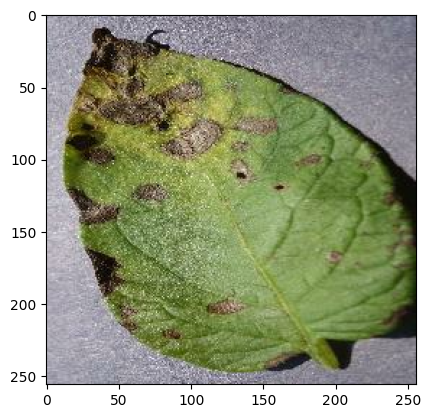

In [115]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = image_batch[0].numpy().astype("uint8")
    
    print("First image to predict")
    plt.imshow(first_image)
    print("Actual Label:",class_names[labels_batch[0].numpy()])
    
    batch_prediction = model.predict(images_batch)
    print("Predicted Label:",class_names[np.argmax(batch_prediction[0])])

In [117]:
def predict(model, img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array, 0)
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)
    return predicted_class, confidence

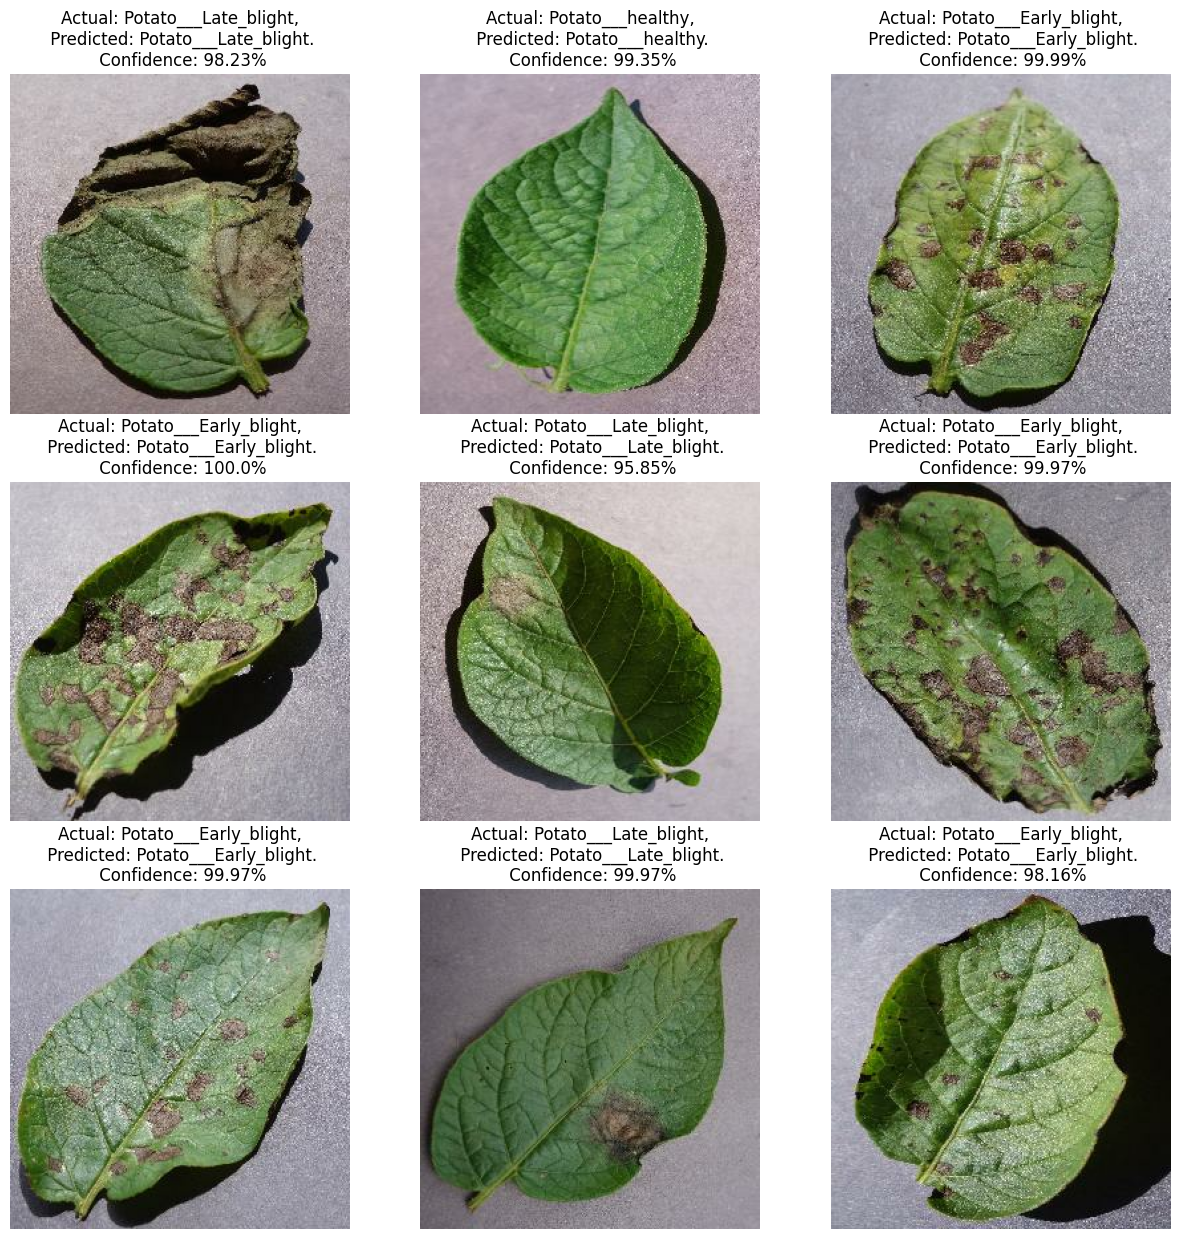

In [121]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i].numpy())
        
        actual_class = class_names[labels[i]]
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")

In [128]:
import os
model_version = max([int(i) for i in (os.listdir("../models")+[0])])+1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/3\assets
